In [1]:
#import scrublet as scr
import numpy as np
import pandas as pd
import statistics as st
import pickle

import re
import csv
import scanpy as sc 
import scanpy.external as sce
import phate
import matplotlib
from matplotlib import pyplot as plt
import warnings

from scipy.stats import binom
from scipy.stats import multinomial
import seaborn
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings('ignore')
import scrublet as scr
import harmonypy as hm
from random import sample
import matplotlib.patches as mpatches
import statistics as stat
import scipy

### Load Data

In [2]:
#CM_Cells = sc.read_h5ad('./Large_CM_DF.h5ad')

In [3]:
PATH = '../../Data/Pickles/'
Dict_File = open(PATH + "CM_Large_sgRNA_Dic_Filtered.pkl", "rb")
SGRNA_CELLS_DIC = pickle.load(Dict_File)

In [4]:
PATH = '../../Data/Pickles/'
Dict_File = open(PATH + "Guide_Dictionary_Filtered.pkl", "rb")
Guide_Dictionary = pickle.load(Dict_File)

In [5]:
Clean_NC_Cells = []
[Clean_NC_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary['NC']]

[None, None, None, None]

### Distribution (BarGraph)

In [6]:
cluster_list = ['2', '3', '1', '0']

In [9]:
Target = 'TNNT2_PROM1'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TNNT2_PROM1_Percents = Target_Percents

Target = 'TNNT2_ENH2'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TNNT2_ENH2_Percents = Target_Percents

Target = 'TNNT2_ENH3'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
TNNT2_ENH3_Percents = Target_Percents

Target = 'NGFRAP1'
Target_Cells = []
[Target_Cells.extend(SGRNA_CELLS_DIC[i]) for i in Guide_Dictionary[Target]]
Target_SC = CM_Cells[Target_Cells]
Target_Cell_Num = Target_SC.shape[0]
Target_Percents = []
for cluster in cluster_list:
    Target_Percents.append((Target_SC[Target_SC.obs.louvain == cluster].shape[0]/Target_Cell_Num)*100)
NGFRAP1_Percents = Target_Percents

NC_SC = CM_Cells[Clean_NC_Cells]
NC_Cell_Num = NC_SC.shape[0]
NC_Percents = []
for cluster in cluster_list:
     NC_Percents.append((NC_SC[NC_SC.obs.louvain == cluster].shape[0]/NC_Cell_Num)*100)

In [10]:
NC_cmap = {
    'Progenitor': '#4c72b0',
    'Early_CM': '#4c72b0',
    'Mid_CM' : '#4c72b0',
    'Late_CM' : '#4c72b0'}

In [11]:
NGFRAP1_cmap = {
    'Progenitor': '#8172b3',
    'Early_CM': '#8172b3',
    'Mid_CM' : '#8172b3',
    'Late_CM' : '#8172b3'}

In [12]:
TNNT2_PROM1_cmap = {
    'Progenitor': '#c44e52',
    'Early_CM': '#c44e52',
    'Mid_CM' : '#c44e52',
    'Late_CM' : '#c44e52'}

In [13]:
TNNT2_ENH2_cmap = {
    'Progenitor': '#C4B04F',
    'Early_CM': '#C4B04F',
    'Mid_CM' : '#C4B04F',
    'Late_CM' : '#C4B04F'}

In [14]:
TNNT2_ENH3_cmap = {
    'Progenitor': '#C4B04F',
    'Early_CM': '#C4B04F',
    'Mid_CM' : '#C4B04F',
    'Late_CM' : '#C4B04F'}

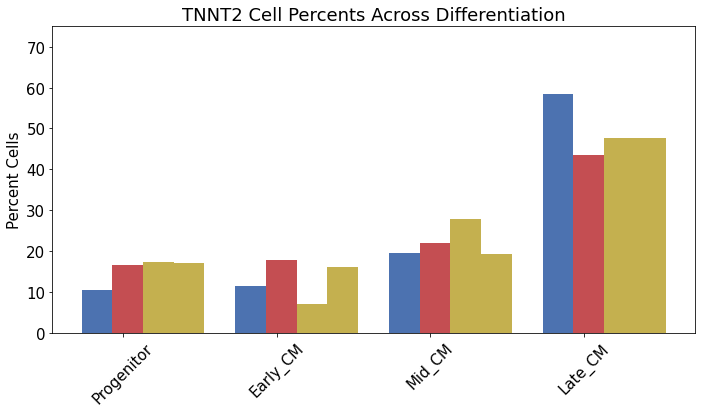

In [15]:
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(1, figsize=(10,6))

width = 0.20

labels =  ['Progenitor', 'Early_CM', 'Mid_CM', 'Late_CM' ]


for i, c in enumerate(NC_Percents):
    ax.bar(i, c, width, color=NC_cmap[labels[i]])
   
for i, c in enumerate(TNNT2_PROM1_Percents):
    ax.bar(i + width, c, width, color=TNNT2_PROM1_cmap[labels[i]])
    
for i, c in enumerate(TNNT2_ENH2_Percents):
    ax.bar(i + width+ width, c, width, color=TNNT2_ENH2_cmap[labels[i]])
    
for i, c in enumerate(TNNT2_ENH3_Percents):
    ax.bar(i + width+ width+ width, c, width, color=TNNT2_ENH3_cmap[labels[i]])
    
ax.set_xticks(np.arange(i+1) + .17)
ax.set_xticklabels(labels)
ax.set_ylabel('% Cells')
plt.xticks(rotation = 45)
rects = ax.patches
rect_subset = rects[4:]


plt.ylim(0, 75)
plt.ylabel('Percent Cells')
plt.title('TNNT2 Cell Percents Across Differentiation')
fig.tight_layout()
fig.savefig('./TNNT2_Percents_Barplot_CM.pdf')

### Violin plots of pseudotime distribution

In [16]:
Sig_Targets= ['TNNT2_PROM1', 'TNNT2_ENH2', 'TNNT2_ENH3']

(0.0, 18715.0)

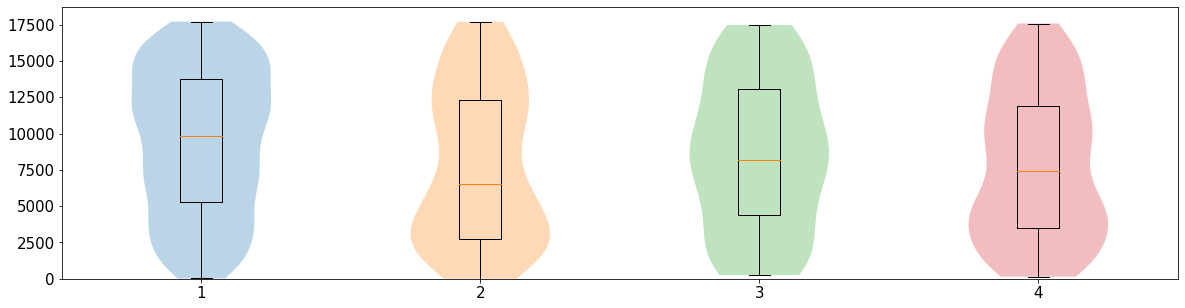

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), sharey=True)

target_range = list(range(2, len(Sig_Targets)+ 2))

NC_SC = CM_Cells[Clean_NC_Cells]
NC_Pseudos = NC_SC.obs.rank_pseudotime

plt.violinplot(NC_Pseudos, positions = [1], vert=True, showextrema=False)
plt.boxplot(NC_Pseudos, positions= [1], vert=True)

for i,target in enumerate(Sig_Targets):
    Cell_List = []
    [Cell_List.extend(SGRNA_CELLS_DIC[sg]) for sg in Guide_Dictionary[target]]
    Target_SC = CM_Cells[Cell_List]
    Target_Pseudos = Target_SC.obs.rank_pseudotime
    plt.violinplot(Target_Pseudos, positions = [target_range[i]], vert=True, showextrema=False)
    plt.boxplot(Target_Pseudos, positions= [target_range[i]], vert=True)

plt.ylim(0,CM_Cells.obs.rank_pseudotime.max()+1000)
fig.savefig('./TNNT2_Violin_Across_CM.pdf')

In [23]:
for target in Sig_Targets:
    Cell_List = []
    [Cell_List.extend(SGRNA_CELLS_DIC[sg]) for sg in Guide_Dictionary[target]]
    Target_SC = CM_Cells[Cell_List]
    Target_Pseudos = Target_SC.obs.rank_pseudotime
    print(target + ' MW p-val ' +  str(scipy.stats.mannwhitneyu(NC_Pseudos, Target_Pseudos)[1]))

TNNT2_PROM1 MW p-val 0.0003987782459992201
TNNT2_ENH2 MW p-val 0.07060540134019977
TNNT2_ENH3 MW p-val 1.176052924876008e-06
